## 1-dimensional Classification via tensorflow ##
Richard Sowers 2018-05-16

Copyright 2018 University of Illinois Board of Trustees. All Rights Reserved. Licensed under the MIT license

based in part on <https://www.tensorflow.org/tutorials/keras/basic_classification>

In [1]:
import numpy
import itertools
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras

In [2]:
numpy.random.seed(0)
N=500
threshold=0.3

In [3]:
xvals=numpy.random.normal(size=N)
labels=[(1 if x>threshold else 0) for x in xvals]

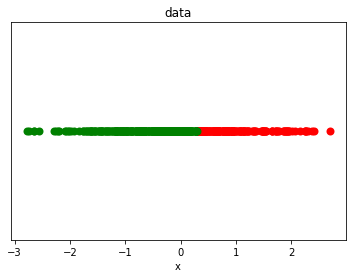

In [4]:
red_pts=numpy.array([x for (x,label) in zip(xvals,labels) if label==1])
green_pts=numpy.array([x for (x,label) in zip(xvals,labels) if label==0])
plt.figure()
plt.scatter(red_pts,0*red_pts,color="red",linewidth=2)
plt.scatter(green_pts,0*green_pts,color="green",linewidth=2)
plt.xlabel("x")
plt.yticks([])
plt.title("data")
plt.show()
plt.close()

In [5]:
# let's try to do logistic regression
model = keras.Sequential([
    #keras.layers.Flatten(input_shape=(1,1)),
    #keras.layers.Dense(2, activation=tensorflow.nn.relu),
    keras.layers.Dense(2, activation=tensorflow.nn.softmax)
])
model.compile(optimizer=tensorflow.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
xvals_shaped=numpy.array([[xx] for xx in xvals])
labels_shaped=numpy.array(labels)
print(xvals_shaped.shape)
print(len(labels))

(500, 1)
500


In [15]:
numpy.random.seed(0) #results seem to fluctuate with seed
model.fit(xvals_shaped, labels_shaped, initial_epoch=0,epochs=30)

Epoch 1/30
500/500 [==============================] - 0s 50us/step - loss: 0.3038 - acc: 0.9580
Epoch 2/30
500/500 [==============================] - 0s 44us/step - loss: 0.3012 - acc: 0.9600
Epoch 3/30
500/500 [==============================] - 0s 48us/step - loss: 0.2987 - acc: 0.9640
Epoch 4/30
500/500 [==============================] - 0s 86us/step - loss: 0.2963 - acc: 0.9640
Epoch 5/30
500/500 [==============================] - 0s 90us/step - loss: 0.2939 - acc: 0.9640
Epoch 6/30
500/500 [==============================] - 0s 90us/step - loss: 0.2915 - acc: 0.9640
Epoch 7/30
500/500 [==============================] - 0s 94us/step - loss: 0.2892 - acc: 0.9640
Epoch 8/30
500/500 [==============================] - 0s 100us/step - loss: 0.2869 - acc: 0.9660
Epoch 9/30
500/500 [==============================] - 0s 84us/step - loss: 0.2847 - acc: 0.9700
Epoch 10/30
500/500 [==============================] - 0s 76us/step - loss: 0.2825 - acc: 0.9700
Epoch 11/30
500/500 [=================

In [16]:
def predict(in_x):
    confidences=model.predict(numpy.expand_dims([in_x],0))
    print(confidences)
    return numpy.argmax(confidences[0])
    
print(predict(0.4))
print(predict(0.35))
print(predict(0.25))
print(predict(0.2))

[[0.47200412 0.5279958 ]]
1
[[0.49841517 0.5015849 ]]
1
[[0.55111647 0.44888353]]
0
[[0.5771156  0.42288437]]
0
